| Kütüphane    | Açıklama                                  |
| ------------ | ----------------------------------------- |
| `matplotlib` | En temel görselleştirme kütüphanesi       |
| `seaborn`    | Matplotlib üzerine kurulmuş, daha estetik |
| `plotly`     | Etkileşimli (zoom, hover) grafikler       |
| `missingno`  | Eksik verilerin görselleştirilmesi        |


| Soru                             | Cevaplanacak Grafik Türü       |
| -------------------------------- | ------------------------------ |
| Dağılım normal mi?               | Histogram + KDE                |
| Aykırı değer var mı?             | Boxplot, Violinplot            |
| Kategoriler nasıl dağılmış?      | Countplot, Barplot             |
| Değişkenler arası ilişki var mı? | Heatmap, Scatterplot, Pairplot |
| Gruplar nasıl ayrılıyor?         | FacetGrid, Hue parametresi     |
| Zamanla değişim var mı?          | Lineplot, Plotly line          |


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Matplotlib

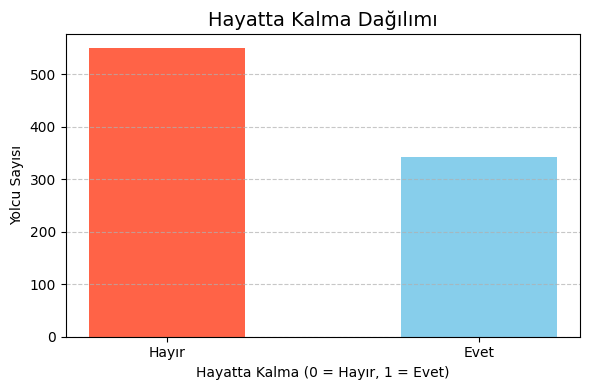

In [ ]:
survived_counts = df['survived'].value_counts()

plt.figure(figsize=(6,4)) # Grafik boyutu
plt.bar(survived_counts.index, survived_counts.values, color=['tomato', 'skyblue'], width=0.5) # Bar grafiği oluştur
plt.title("Hayatta Kalma Dağılımı", fontsize=14) # Başlık
plt.xlabel("Hayatta Kalma (0 = Hayır, 1 = Evet)") # X ekseni etiketi
plt.ylabel("Yolcu Sayısı") # Y ekseni etiketi
plt.xticks([0,1], ["Hayır", "Evet"]) # X ekseni etiketleri
plt.grid(axis='y', linestyle='--', alpha=0.7) # Y ekseni için grid çizgileri
plt.tight_layout() # Grafik düzenini sıkıştır
plt.show()

figsize: Grafik boyutu

color: Çubuk renkleri

width: Çubuk kalınlığı

xticks: Etiketler

grid: Arka plan çizgileri

Histogram – Sürekli Verilerin Dağılımı


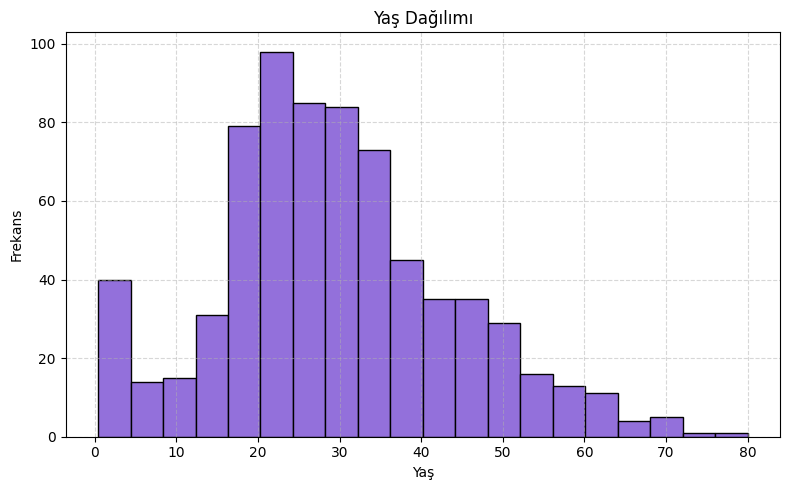

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df["age"], bins=20, color="mediumpurple", edgecolor='black')
plt.title("Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Frekans")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Scatter Plot – İki Sayısal Değişken Arası İlişki

🔍 Parametre Açıklamaları:

alpha: Şeffaflık

c: Renk

edgecolors: Kenarlık rengi

linewidths: Nokta kenar kalınlığı

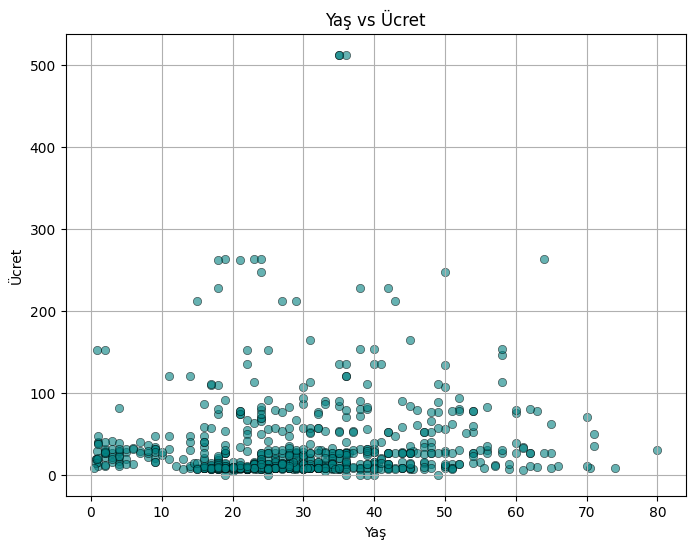

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df["age"], df["fare"], alpha=0.6, c="teal", edgecolors="k", linewidths=0.5) # Dağılım grafiği
plt.title("Yaş vs Ücret")
plt.xlabel("Yaş")
plt.ylabel("Ücret")
plt.grid(True)
plt.show()


🔹Histogram: Sürekli Verilerin Dağılımı


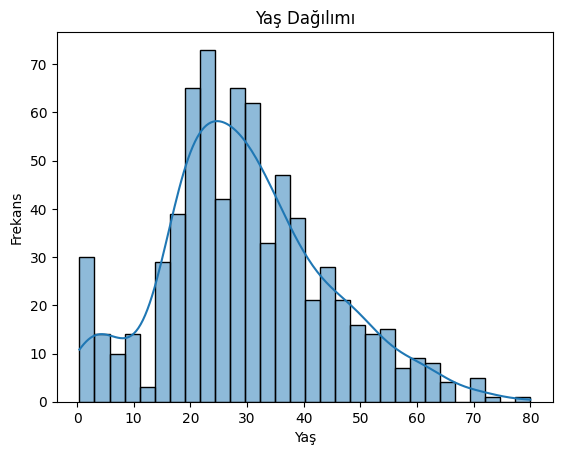

In [ ]:
sns.histplot(df["age"], bins=30, kde=True) # Yaş sütununu histogram olarak çiz (KDE yoğunluk eğrisi)
plt.title("Yaş Dağılımı") # Başlık ekle
plt.xlabel("Yaş") # X eksenine etiket ekle
plt.ylabel("Frekans") # Y eksenine etiket ekle
plt.show() # Grafiği göster


Kod Açıklamaları:

bins=30: Grafikte 30 sütun var.

kde=True: Dağılım eğrisi (yoğunluk) ekler.

histplot: Histogram fonksiyonu

Yaşın hangi aralıklarda yoğunlaştığı

Normal dağılım mı? Çarpık mı?

Countplot: Kategorik Veri Frekansı

C:\Users\asus\AppData\Local\Temp\ipykernel_8220\107891364.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




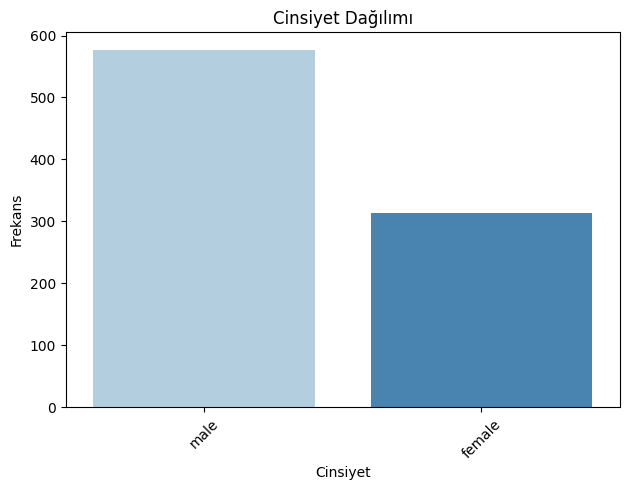

In [ ]:
sns.countplot(x="sex", data=df, palette="Blues") # Cinsiyet sütununu sayım grafiği olarak çiz
plt.xlabel("Cinsiyet") # X eksenine etiket ekle
plt.ylabel("Frekans") # Y eksenine etiket ekle
plt.xticks(rotation=45) # X eksenindeki etiketleri döndür
plt.tight_layout() # Grafik düzenini sıkıştır
plt.title("Cinsiyet Dağılımı") # Başlık ekle
plt.show()


Kadın ve erkek sayısı

Dengesizlik varsa modellemeye etkisi olur

Barplot: Gruplar Arası Ortalama Kıyaslama

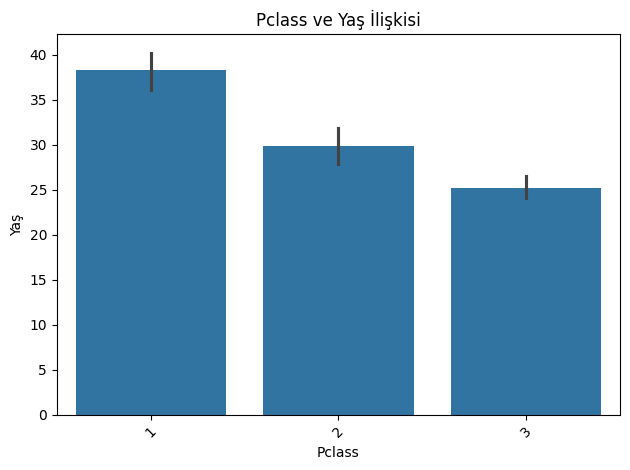

In [ ]:
sns.barplot(x="pclass", y="age", data=df) # Pclass ve yaş sütunlarını çubuk grafiği olarak çiz
plt.title("Pclass ve Yaş İlişkisi") # Başlık ekle
plt.xlabel("Pclass") # X eksenine etiket ekle
plt.ylabel("Yaş") # Y eksenine etiket ekle
plt.xticks(rotation=45) # X eksenindeki etiketleri döndür
plt.tight_layout() # Grafik düzenini sıkıştır
plt.show() # Grafiği göster

Sınıf arttıkça yaş ortalaması düşüyor mu?



Boxplot: Aykırı Değer + Medyan + IQR

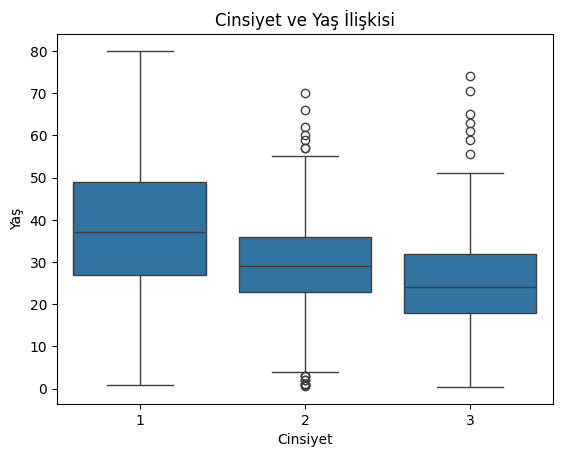

In [ ]:
sns.boxplot(x="pclass", y="age", #hue="sex",
             data=df) # Cinsiyet ve yaş sütunlarını kutu grafiği olarak çiz
plt.title("Cinsiyet ve Yaş İlişkisi") # Başlık ekle
plt.xlabel("Cinsiyet") # X eksenine etiket ekle
plt.ylabel("Yaş") # Y eksenine etiket ekle
plt.show() # Grafiği göster


Medyan (orta çizgi): Ortadaki değer

Q1, Q3: %25 ve %75'lik değerler

Whiskers (bıyıklar): Min ve max (uç değerler hariç)

Outlier: Uç değer (nokta olarak gösterilir)

Heatmap: Korelasyon Matrisi

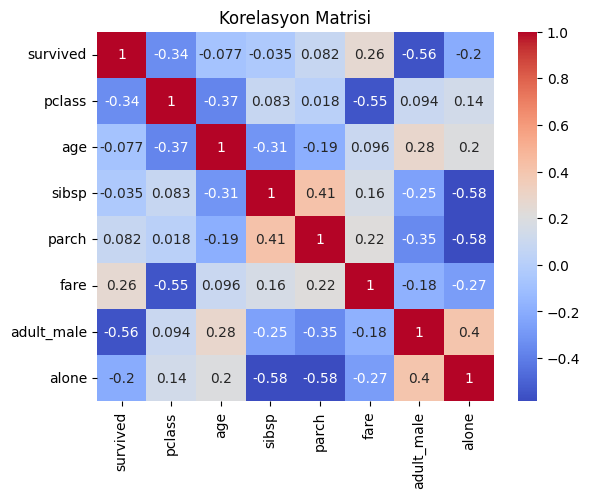

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi") # Başlık ekle
plt.show() # Grafiği göster

İki sayısal değişken arasındaki ilişki

1 = çok güçlü pozitif ilişki

-1 = çok güçlü negatif ilişki

🔹 1. Fare vs. Pclass → -0.55
Negatif ve orta düzey korelasyon.

Sınıf numarası arttıkça (3’e gittikçe), ödenen ücret azalıyor.

Çünkü 1. sınıf yolcular daha yüksek ücret ödüyor.

🔹 2. Fare vs. Survived → 0.26
Pozitif, zayıf-orta korelasyon.

Ücret arttıkça hayatta kalma ihtimali de biraz artıyor.

Mantıklı: Zengin yolcular daha iyi koşullarda, kurtarılma şansı yüksek.

🔹 3. Pclass vs. Survived → -0.32
Negatif orta korelasyon.

1.sınıf yolcular daha çok hayatta kalmış.

3.sınıf yolcular hayatta kalma konusunda dezavantajlı.

🔹 4. Age vs. Survived → 0.09
Çok zayıf pozitif korelasyon.

Yaşın hayatta kalma ihtimali üzerinde belirgin bir etkisi yok.

Ama daha detaylı analiz için yaş aralıklarına bakmak gerekebilir (örneğin çocuklar).

Scatterplot: İki Sürekli Değişken Arası İlişki

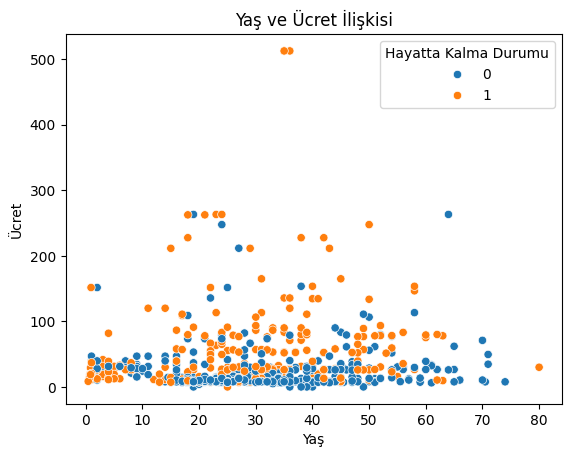

In [ ]:
sns.scatterplot(x="age", y="fare", hue="survived", data=df) # Yaş ve ücret sütunlarını nokta grafiği olarak çiz
plt.title("Yaş ve Ücret İlişkisi") # Başlık ekle
plt.xlabel("Yaş") # X eksenine etiket ekle
plt.ylabel("Ücret") # Y eksenine etiket ekle
plt.legend(title="Hayatta Kalma Durumu")
plt.show() # Grafiği göster


Yaş arttıkça ücret azalıyor mu? Hayatta kalma ilişkisi ne?



Pairplot: Tüm Sayısal Değişkenler

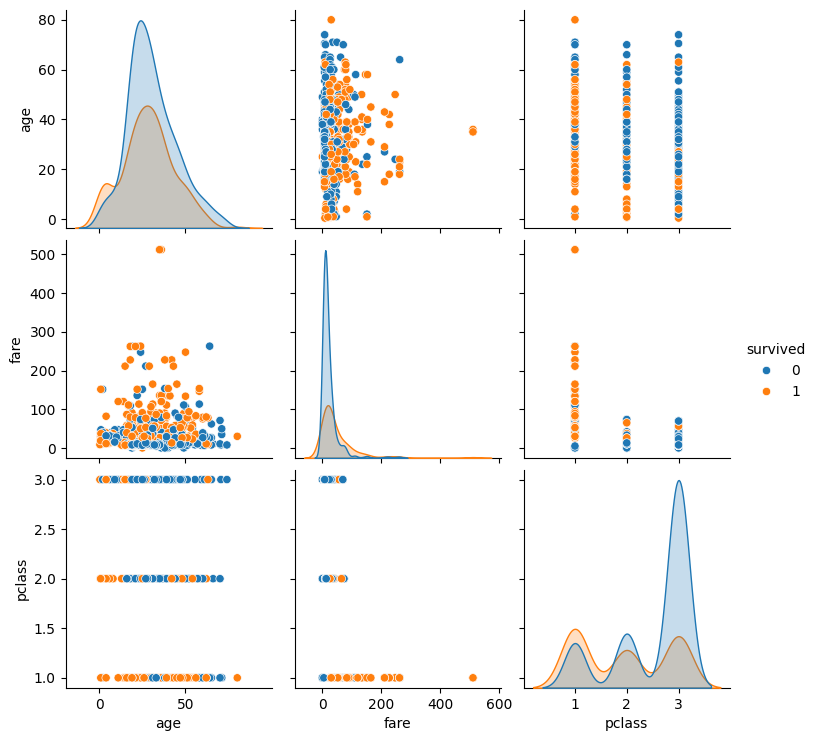

In [ ]:
sns.pairplot(df[["age", "fare", "pclass", "survived"]], hue="survived") # Çift değişkenli dağılım grafiği çiz
plt.show() # Grafiği göster

🔹 FacetGrid: Alt Gruplara Göre Aynı Grafik


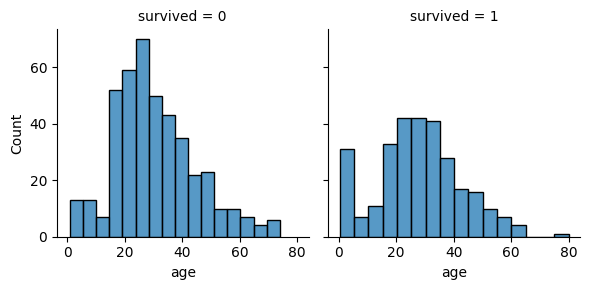

In [ ]:
g = sns.FacetGrid(df, col="survived") # FacetGrid ile hayatta kalma durumuna göre alt gruplar oluştur
g.map(sns.histplot, "age") # Her alt grupta yaş sütununu histogram olarak çiz



Hayatta kalanların yaş dağılımı farklı mı?



PLOTLY (Etkileşimli)

In [ ]:
pip install plotly

In [ ]:
import plotly.express as px

fig = px.histogram(df, x="age", color="sex", marginal="box")
fig.show()


EKSİK VERİ GÖRSELLEŞTİRME (MISSINGNO)

In [ ]:
pip install missingno

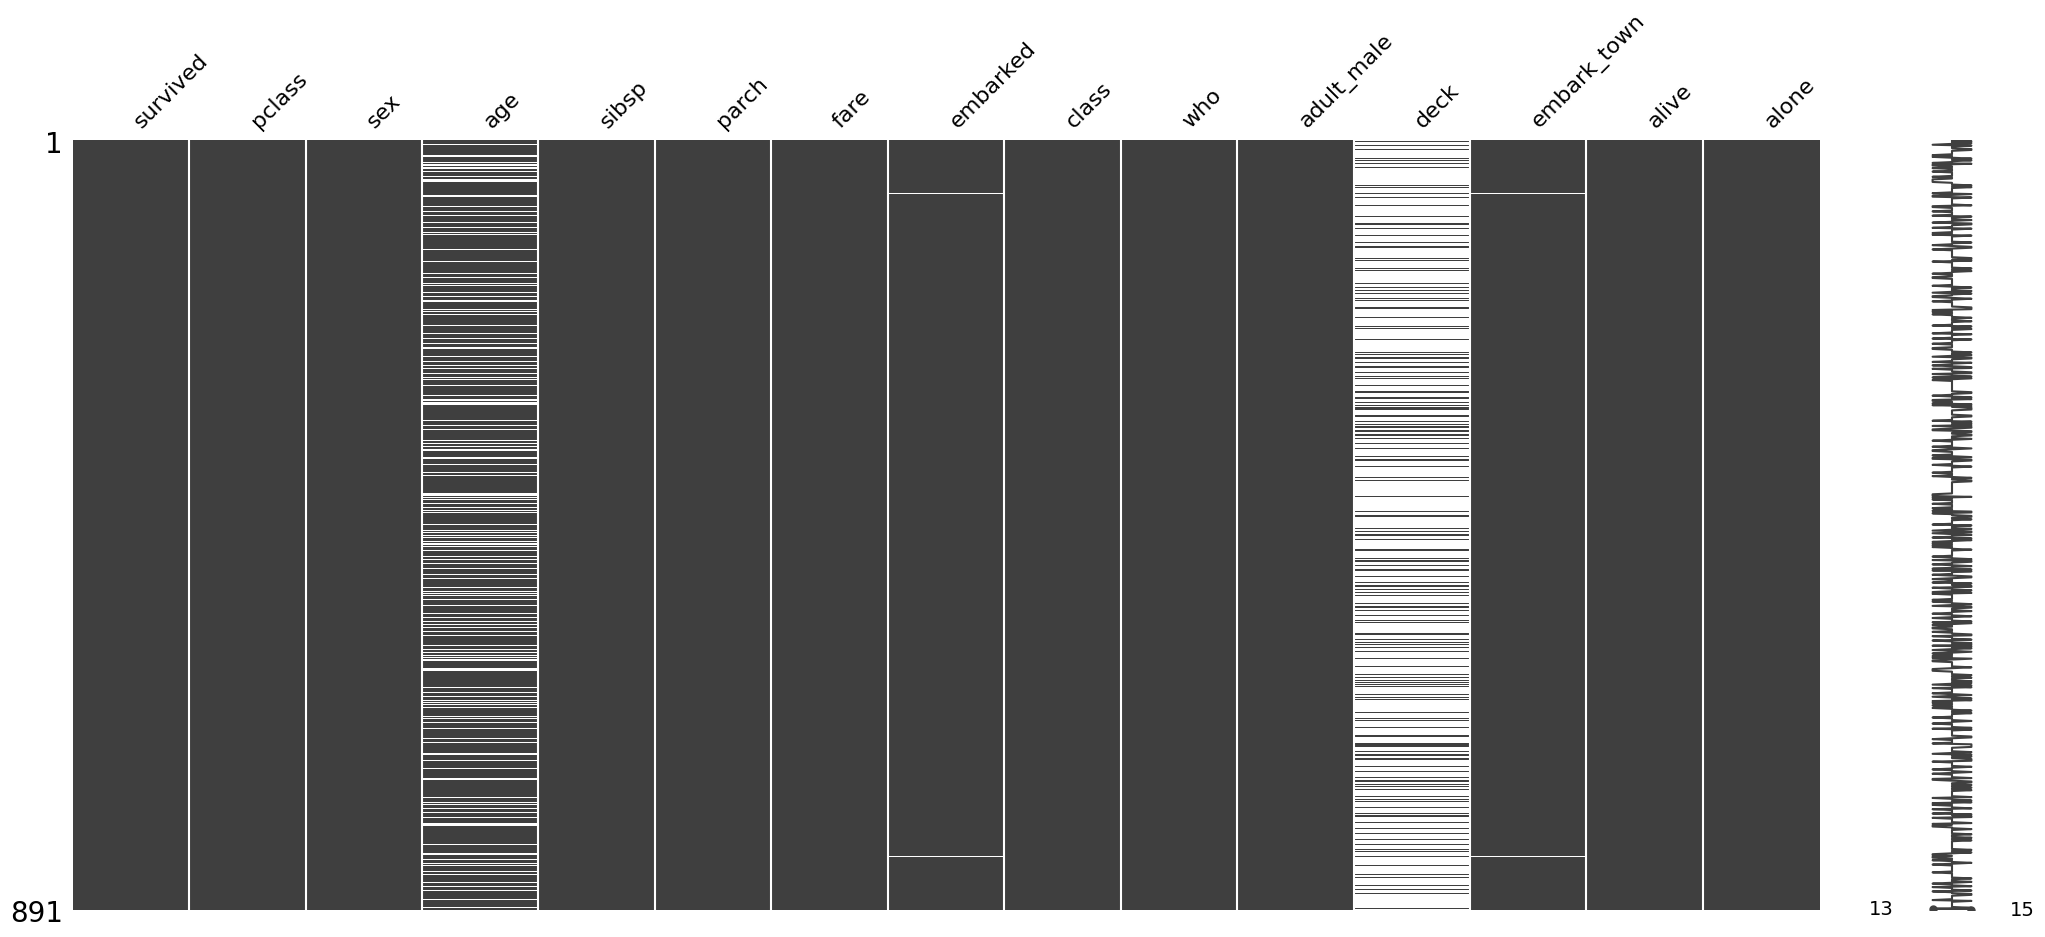

In [ ]:
import missingno as msno

msno.matrix(df) # Eksik verileri görselleştir
plt.show() # Grafiği göster


GÖRSELİ YORUMLAMA REHBERİ

📊 İLERİ SEVİYE GÖRSELLEŞTİRME İÇERİĞİ

Gruplama + Sayısal Dağılım Analizi

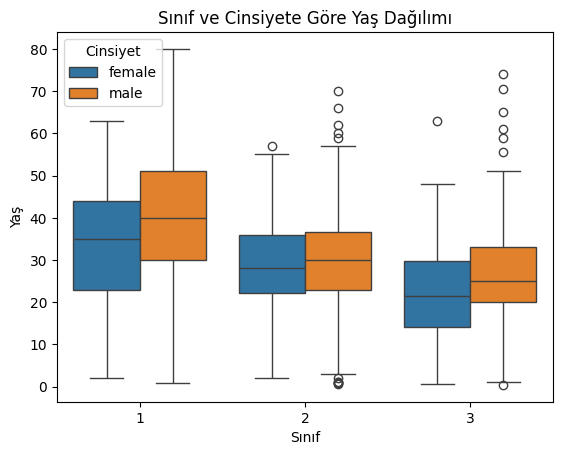

In [ ]:
sns.boxplot(x="pclass", y="age", hue="sex", data=df)
plt.title("Sınıf ve Cinsiyete Göre Yaş Dağılımı")
plt.xlabel("Sınıf") # X eksenine etiket ekle
plt.ylabel("Yaş") # Y eksenine etiket ekle
plt.legend(title="Cinsiyet")
plt.show() # Grafiği göster

sınıfta yaş ortalaması daha mı yüksek?

Kadın ve erkek yolcuların yaş dağılımı nasıl farklılaşıyor?

 Grup Bazlı Hayatta Kalma Oranı

Text(0.5, 1.0, 'Cinsiyet ve Sınıfa Göre Hayatta Kalma Oranı')

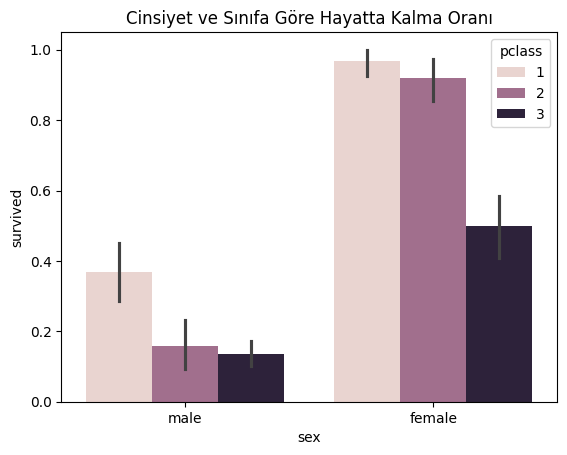

In [ ]:
sns.barplot(x="sex", y="survived", hue="pclass", data=df)
plt.title("Cinsiyet ve Sınıfa Göre Hayatta Kalma Oranı")


Kadınlar her sınıfta daha mı yüksek oranda hayatta kalmış?

3.sınıf erkeklerin hayatta kalma oranı çok düşük olabilir.

FacetGrid ile Gruplama

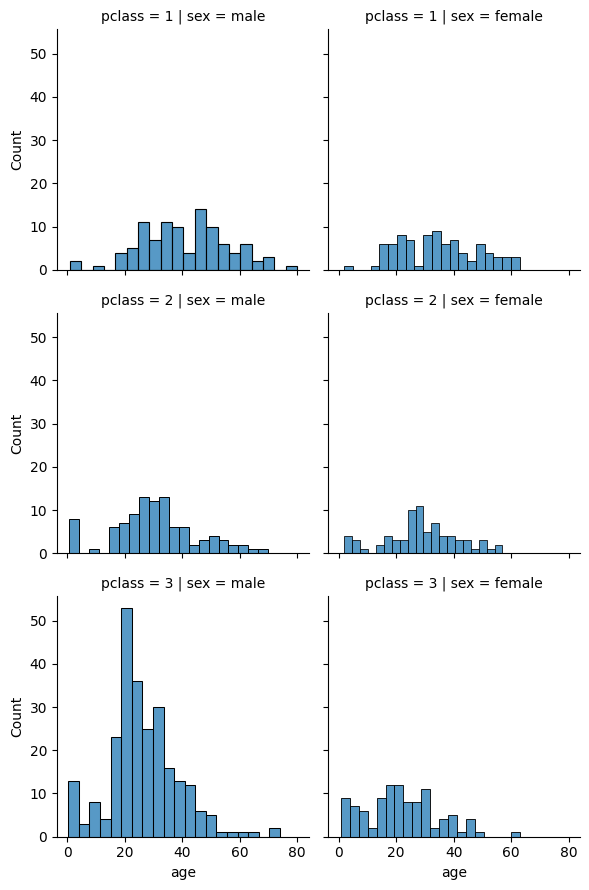

In [ ]:
g = sns.FacetGrid(df, col="sex", row="pclass")
g.map(sns.histplot, "age", bins=20)


Her bir sınıf ve cinsiyet kombinasyonunun yaş dağılımını ayrı ayrı gösterir.

Genç yolcular belirli sınıf ve cinsiyetlerde yoğunlaşmış mı?

Gruplara Göre KDE (Yoğunluk Eğrisi)

Text(0.5, 1.0, 'Cinsiyete Göre Yaş Dağılımı (KDE)')

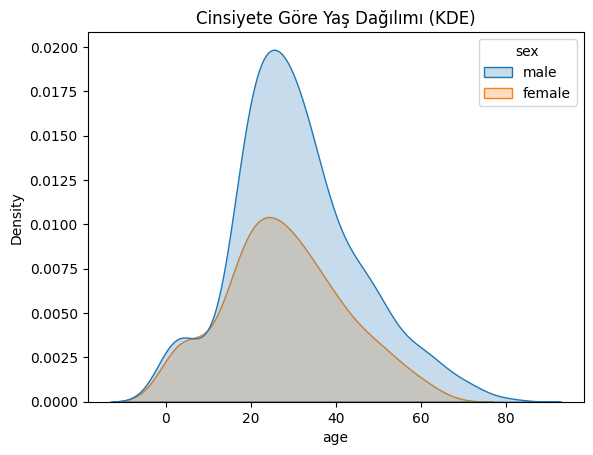

In [ ]:
sns.kdeplot(data=df, x="age", hue="sex", fill=True) # Cinsiyet sütununa göre yaş dağılımını KDE ile çiz
plt.title("Cinsiyete Göre Yaş Dağılımı (KDE)") # Başlık ekle


Kadın ve erkek yolcuların yaş dağılımları farklı mı?

KDE eğrileri altında kalan alan, yaşın yoğunlaştığı yerleri gösterir.

Waffle Chart (Plotly ile)

In [ ]:
import plotly.express as px
fig = px.sunburst(df, path=["sex", "pclass", "survived"], values='fare')
fig.show()


Bu grafik, birden fazla kategoriyi iç içe göstererek ilişkileri anlamamıza yardımcı olur.

Kim ne kadar ücret ödemiş, hangi gruplar hayatta kalmış?

Stripplot + Boxplot Kombosu

<Axes: xlabel='pclass', ylabel='fare'>

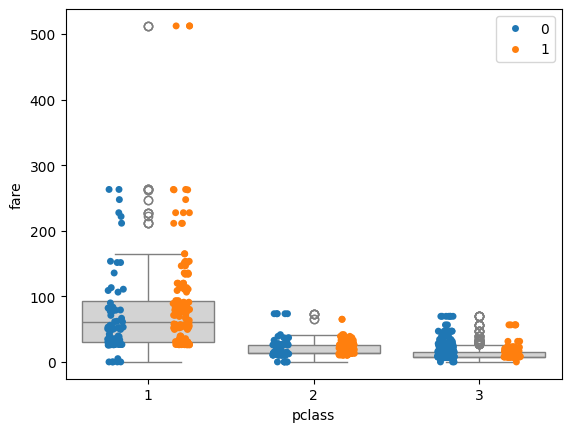

In [ ]:
sns.stripplot(x="pclass", y="fare", data=df, jitter=True, hue="survived", dodge=True)
sns.boxplot(x="pclass", y="fare", data=df, color='lightgray')


Her sınıftaki yolcuların ücret dağılımı nasıl?

Hayatta kalanlar hangi ücret bandında yoğunlaşmış?

Çoklu Categorical Görselleştirme

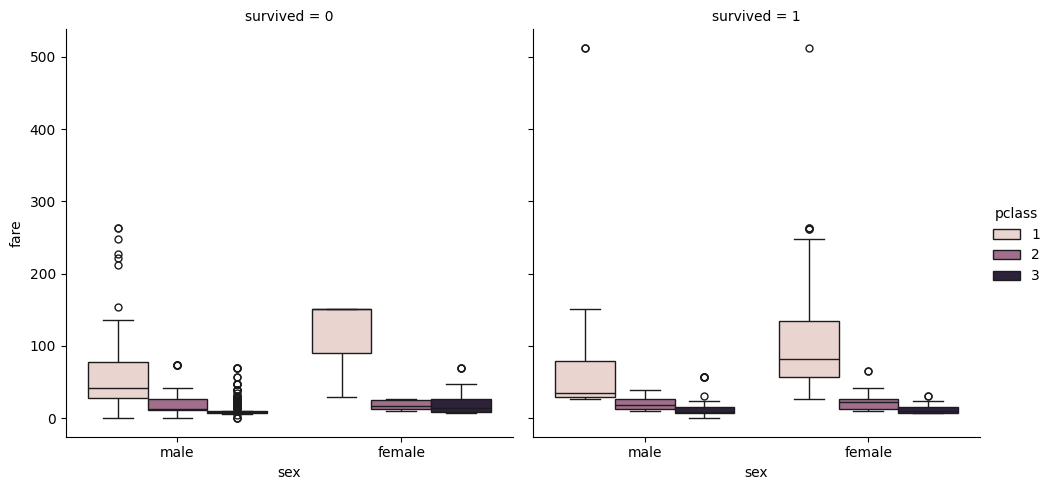

In [ ]:
sns.catplot(x="sex", y="fare", hue="pclass", col="survived", kind="box", data=df)


Hayatta kalma durumuna göre gruplar arası ücret farkı görülebilir mi?

Görselleştirme Stratejisi Önerisi

| Amaç                        | Görsel Tür                                 |
| --------------------------- | ------------------------------------------ |
| Sayısal değişkenin dağılımı | Histogram, KDE, Boxplot                    |
| Kategorik değişken frekansı | Countplot, Barplot                         |
| İki değişken ilişkisi       | Scatterplot, Jointplot, Heatmap            |
| Grup karşılaştırması        | Hue içeren grafikler, FacetGrid            |
| Alt gruplara göre analiz    | `col`, `row`, `hue`, `style` parametreleri |
| Aykırı değer ve yoğunluk    | Boxplot, Stripplot, KDE                    |
| Çoklu değişkenli ilişki     | Pairplot, Sunburst, Treemap                |
